# Data visualization

## Import Dependenices and Custom Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from scripts.data_loader import DataLoader
from scripts.data_analysis import DataAnalysis
from scripts.data_visualize import DataVisualize

In [2]:
# Loads a dataset from a CSV file.
dataLoader = DataLoader()
df = dataLoader.load_csv('../data/cleaned/CleanedMachineLearningRating_v3.csv')

dataVisualize = DataVisualize(df)

g:\KAIM\week3\insurance-risk-analytics-week3\scripts\data_loader.py:32: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(csv_path)


Loaded data from ../data/cleaned/CleanedMachineLearningRating_v3.csv


### Transaction Date

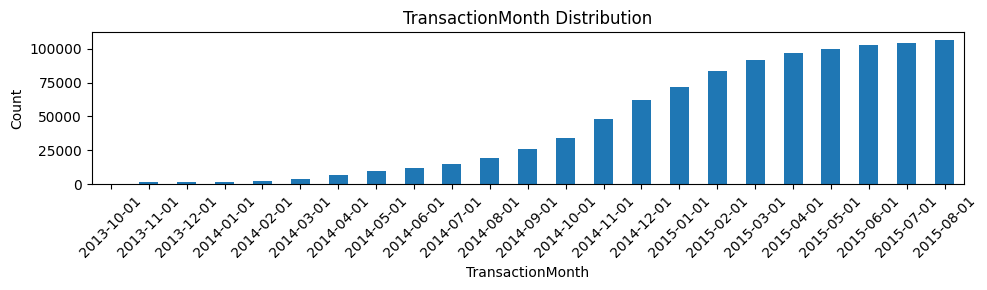

In [3]:
# Plot the transaction month distribution
dataVisualize.plot_value_counts_distributions('TransactionMonth')

The **Transaction Date** column is TransactionMonth.
- There is an increase of transation over timefrom October 2013 to August 2015.

### Columns about the client

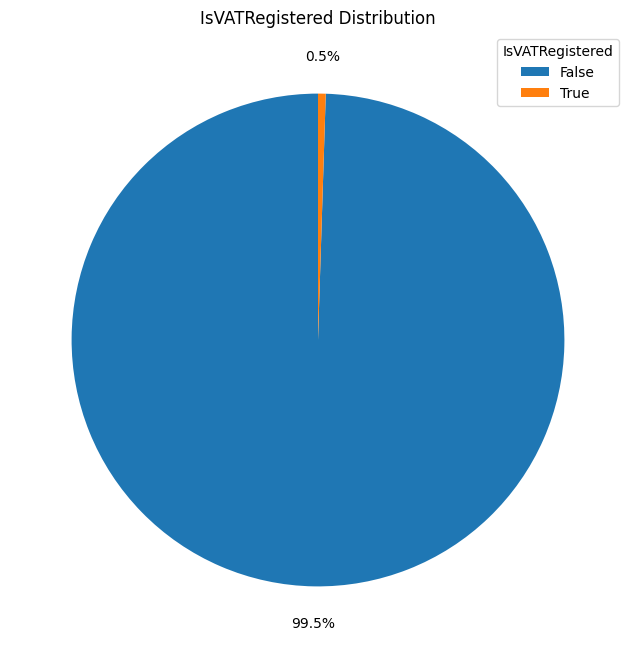

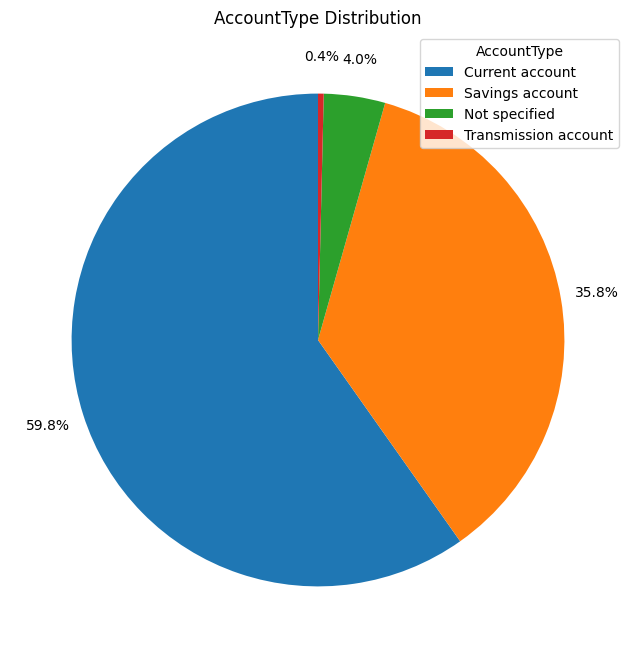

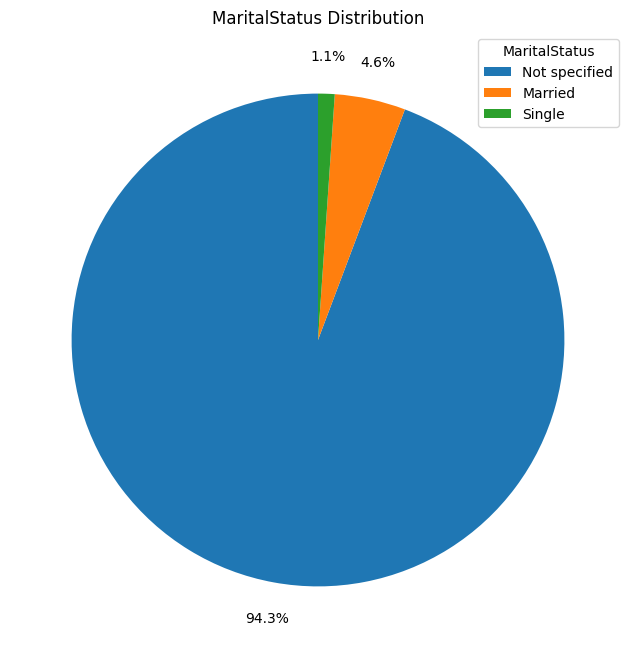

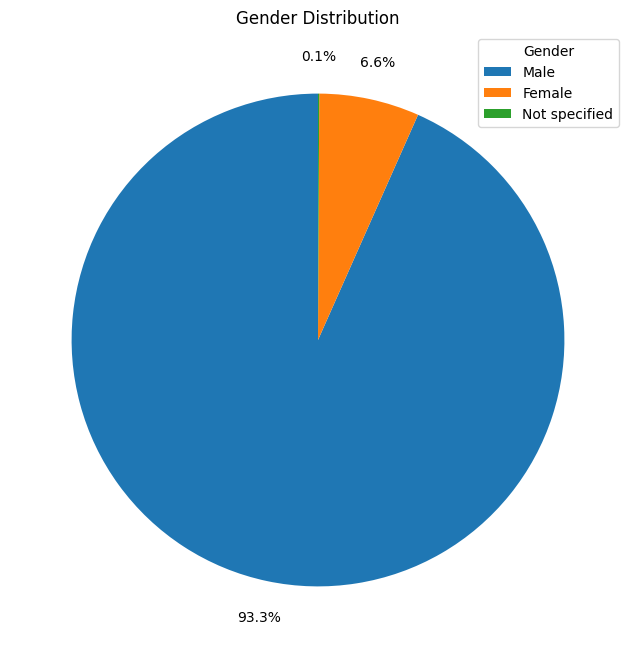

In [4]:
# Plot pie chart for some of client_columns
plot_pie = [ 'IsVATRegistered', 'AccountType', 'MaritalStatus', 'Gender']

dataVisualize.plot_pie_chart(plot_pie)

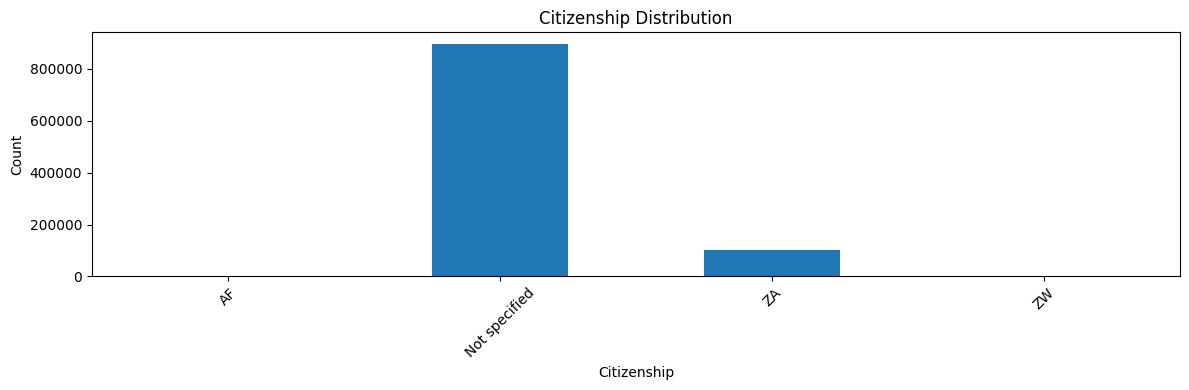

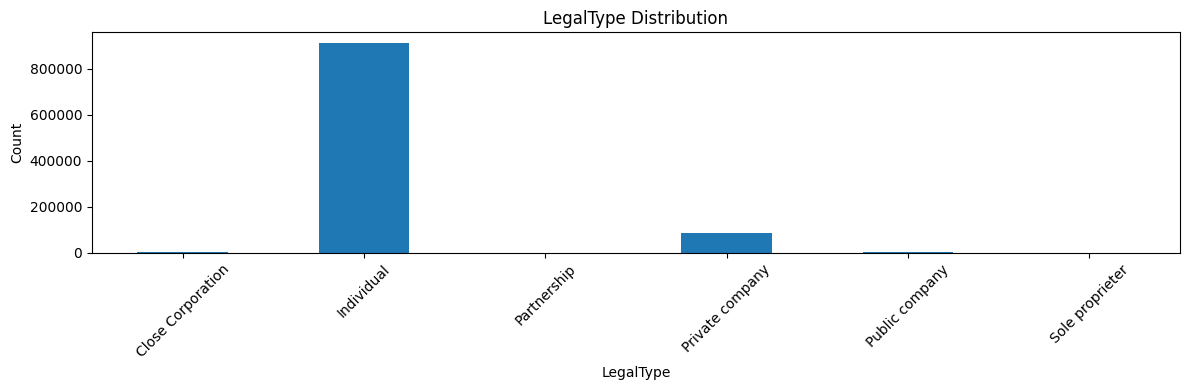

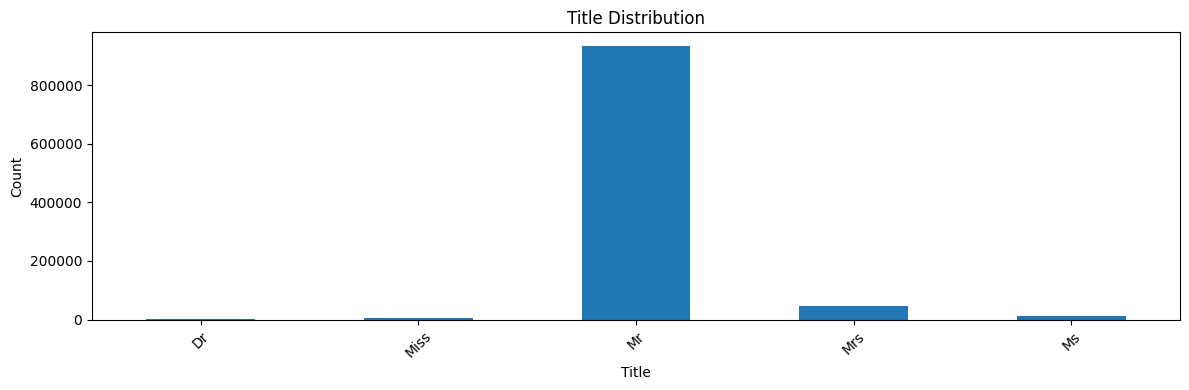

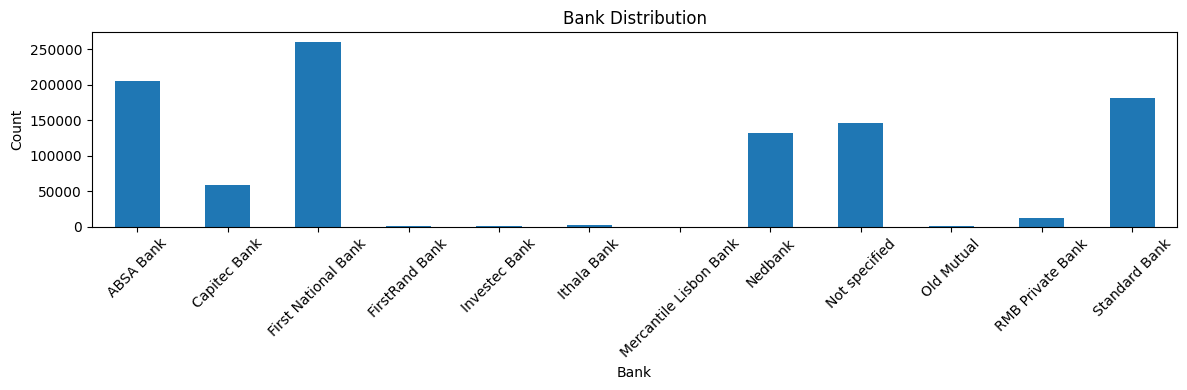

In [5]:
# plot bar chart for some of client_columns
client_columns_filtered = [ 'Citizenship', 'LegalType', 'Title', 'Bank']

dataVisualize.plot_value_counts_distributions(client_columns_filtered, figsize=(12, 8))

The **Client Information** columns are IsVATRegistered, Citizenship, LegalType, Title, Language,
       Bank, AccountType, MaritalStatus and Gender.
- **IsVATRegistered**: True(0.5%), False(99.5%)
- **Citizenship**: 'Not specified' has the highest count
- **LegalType**: Individual'(highest)
- **Title**: 'Mr'(highest)
- **Bank**: Highest value is First National Bank
- **AccountType**: 'Current account'(highest)
- **MaritalStatus**: 'Not specified'(highest),
- **Gender**: 'Male'(highest)

### Client Location

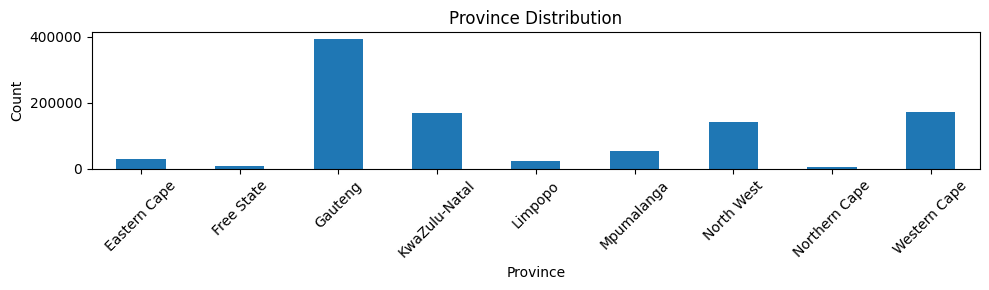

In [6]:
dataVisualize.plot_value_counts_distributions('Province')

The **Client Location** columns are 'Country', 'Province', 'PostalCode', 'MainCrestaZone' and 'SubCrestaZone'.
- **Provice**: Gauteng the highest count.

### Car Insured

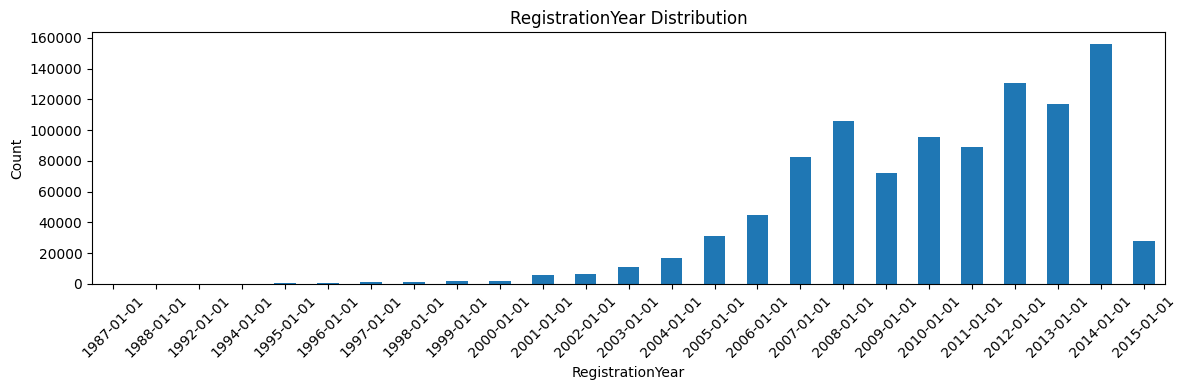

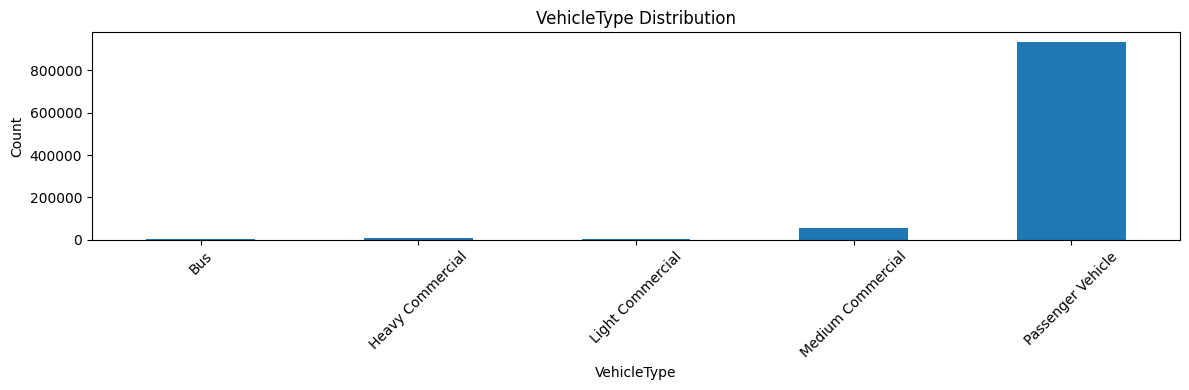

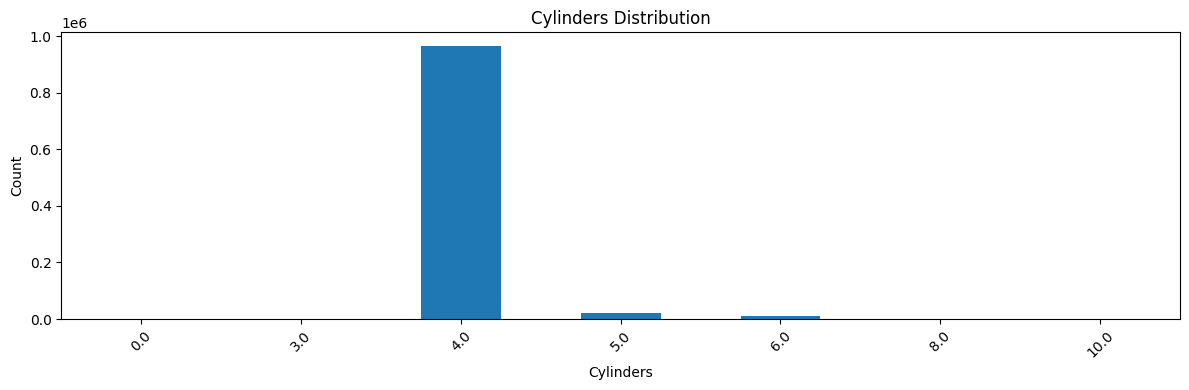

In [7]:
# plot bar chart for some of car issued
bar_chart = [ 'RegistrationYear', 'VehicleType', 'Cylinders']

dataVisualize.plot_value_counts_distributions(bar_chart, figsize=(12, 8))

Half **Car Issued** columns are 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', and 'VehicleIntroDate'.
- **ItemType**: Dropped due to having one unique value.
- **make**: Removed trailing space.
- Droped rows which have  **552 missing values** in the same row because vechicle information is important.

Text(0.5, 1.0, 'Correlation Matrix of Premiums and Claims')

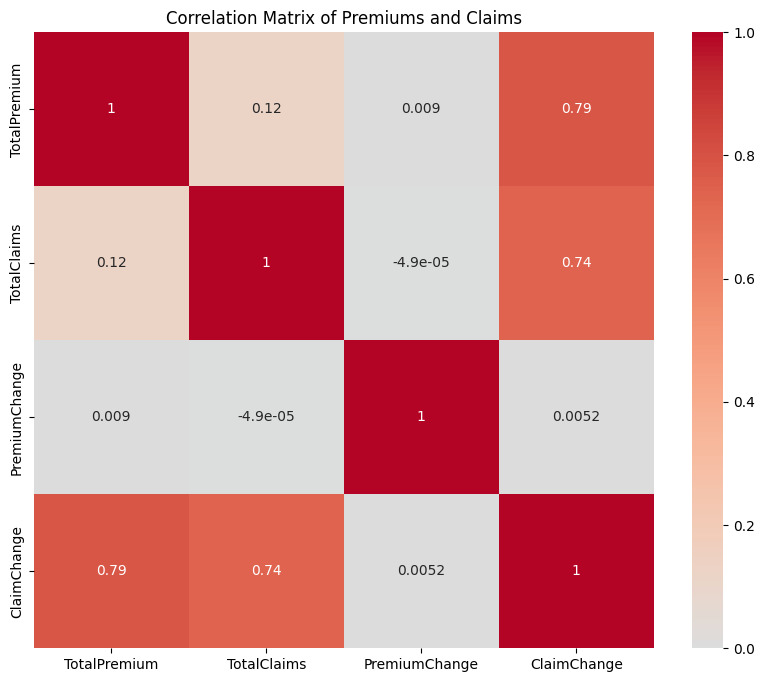

In [8]:
# Calculate monthly changes
df['PremiumChange'] = df.groupby('PostalCode')['TotalPremium'].pct_change()
df['ClaimChange'] = df.groupby('PostalCode')['TotalClaims'].pct_change()

# Correlation matrix (all numerical variables)
corr_matrix = df[['TotalPremium', 'TotalClaims', 'PremiumChange', 'ClaimChange']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Premiums and Claims')

Overall Portfolio Loss Ratio: 104.77%

Loss Ratio by Province:
Province
Gauteng          1.222018
KwaZulu-Natal    1.082693
Western Cape     1.059472
North West       0.790367
Mpumalanga       0.720897
Free State       0.680758
Limpopo          0.661199
Eastern Cape     0.633813
Northern Cape    0.282699
dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_25356\1048145340.py:7: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(group_col).apply(


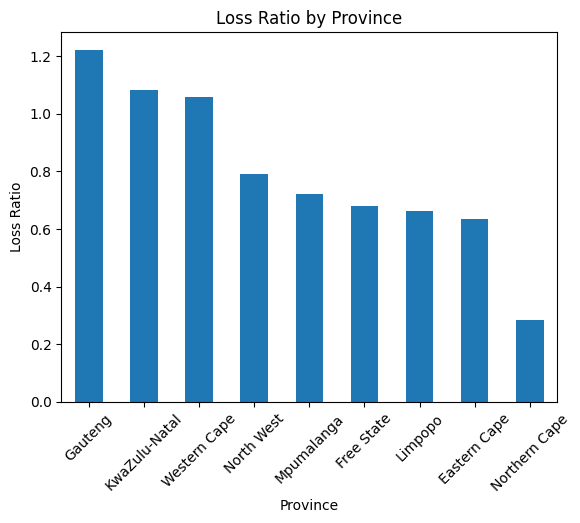


Loss Ratio by VehicleType:
VehicleType
Heavy Commercial     1.628112
Medium Commercial    1.050251
Passenger Vehicle    1.048198
Light Commercial     0.232066
Bus                  0.137292
dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_25356\1048145340.py:7: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(group_col).apply(


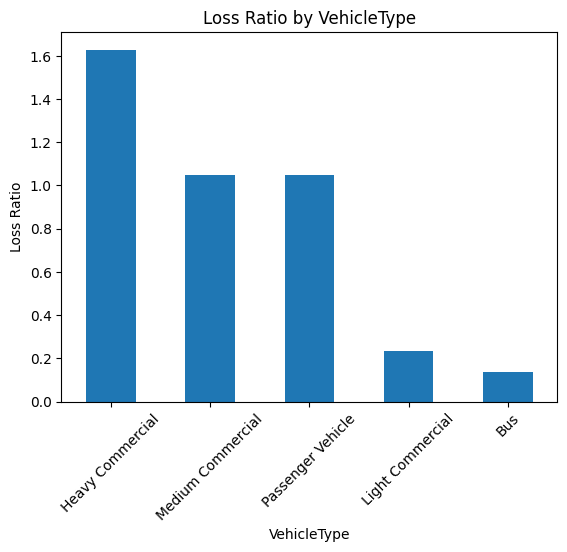


Loss Ratio by Gender:
Gender
Not specified    1.864870
Male             1.068269
Female           0.744326
dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_25356\1048145340.py:7: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(group_col).apply(


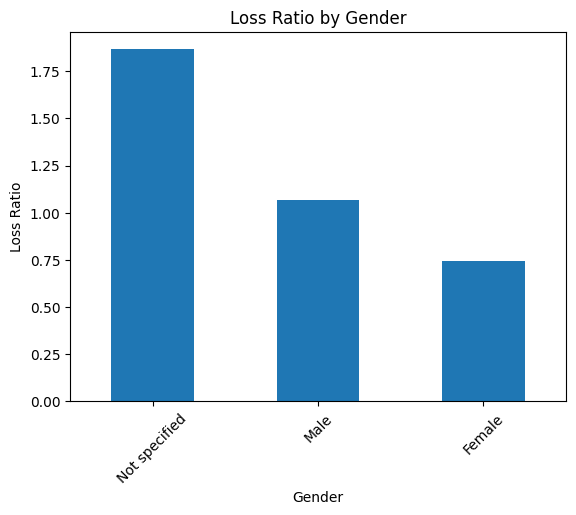

In [9]:
# Overall Loss Ratio
total_loss_ratio = df['TotalClaims'].sum() / df['TotalPremium'].sum()
print(f"Overall Portfolio Loss Ratio: {total_loss_ratio:.2%}")

# Loss Ratio by Dimension
def calculate_loss_ratio(df, group_col):
    return df.groupby(group_col).apply(
        lambda x: x['TotalClaims'].sum() / x['TotalPremium'].sum()
    ).sort_values(ascending=False)

dimensions = ['Province', 'VehicleType', 'Gender']
for dim in dimensions:
    lr = calculate_loss_ratio(df, dim)
    print(f"\nLoss Ratio by {dim}:")
    print(lr)
    lr.plot(kind='bar', title=f'Loss Ratio by {dim}')
    plt.ylabel('Loss Ratio')
    plt.xticks(rotation=45)
    plt.show()

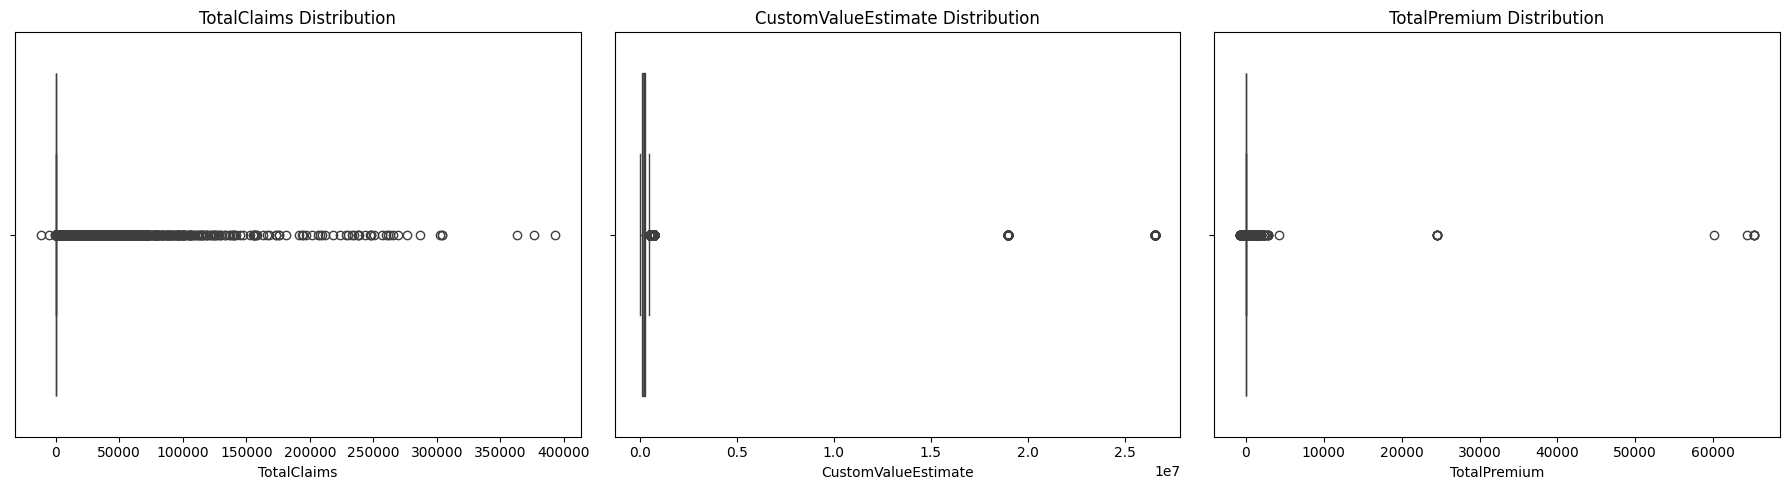

TotalClaims outliers: 2793 (0.28%)
CustomValueEstimate outliers: 327 (0.03%)
TotalPremium outliers: 138832 (13.88%)


In [10]:
financial_vars = ['TotalClaims', 'CustomValueEstimate', 'TotalPremium']

# Distribution Analysis
fig, axes = plt.subplots(1, 3, figsize=(18,5))
for i, var in enumerate(financial_vars):
    sns.boxplot(x=df[var], ax=axes[i])
    axes[i].set_title(f'{var} Distribution')
plt.tight_layout()
plt.show()

# Outlier Detection
outliers = {}
for var in financial_vars:
    q1 = df[var].quantile(0.25)
    q3 = df[var].quantile(0.75)
    iqr = q3 - q1
    outliers[var] = df[(df[var] > q3 + 3*iqr) | (df[var] < q1 - 3*iqr)]
    print(f"{var} outliers: {len(outliers[var])} ({len(outliers[var])/len(df):.2%})")

In [11]:
df.columns

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Bank',
       'AccountType', 'MaritalStatus', 'Gender', 'Province', 'PostalCode',
       'MainCrestaZone', 'SubCrestaZone', 'mmcode', 'VehicleType',
       'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity',
       'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate',
       'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice',
       'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt',
       'Converted', 'SumInsured', 'CalculatedPremiumPerTerm', 'ExcessSelected',
       'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product',
       'TotalPremium', 'TotalClaims', 'PremiumChange', 'ClaimChange'],
      dtype='object')

C:\Users\user\AppData\Local\Temp\ipykernel_25356\474479258.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.resample('M').agg({


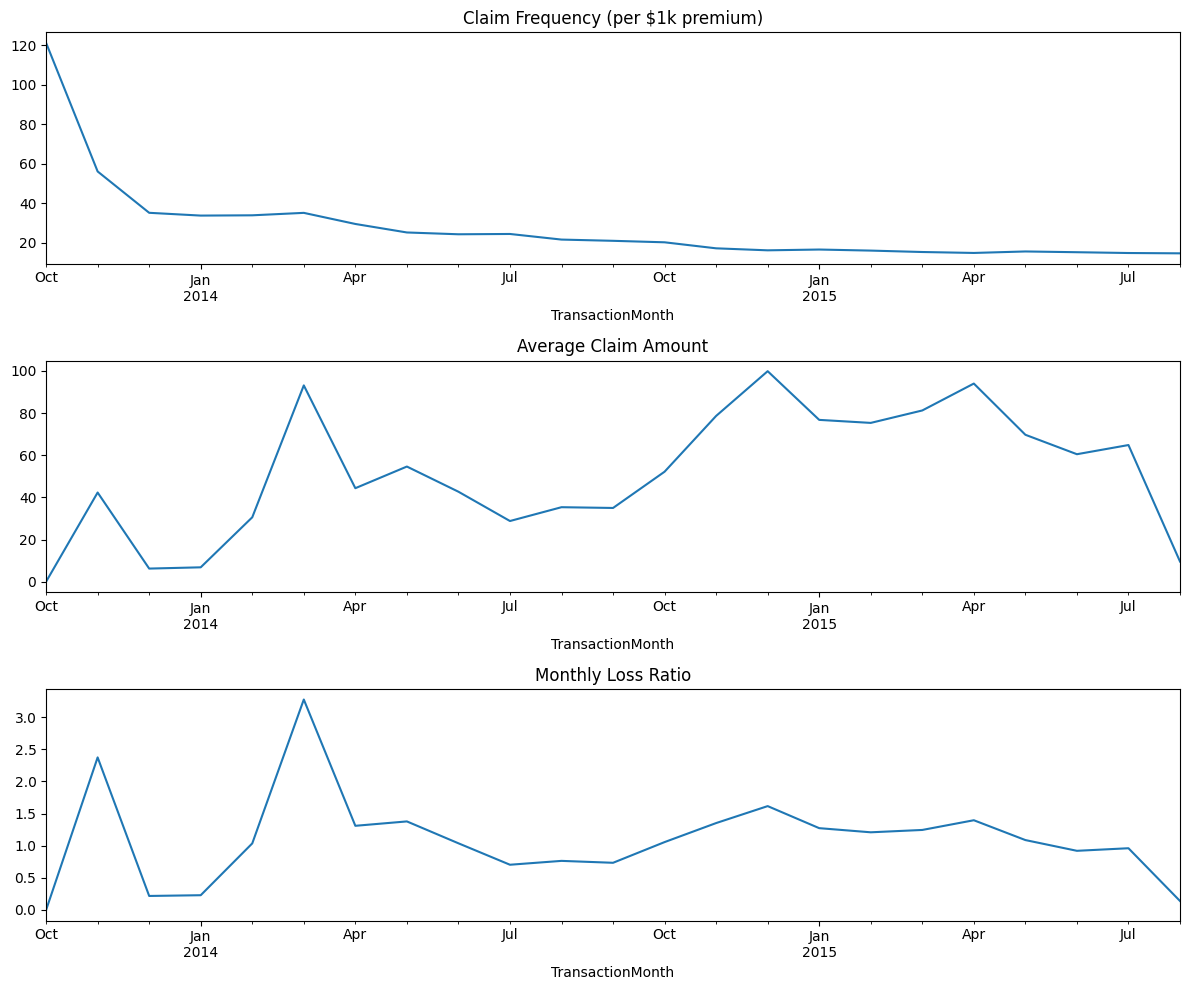

In [12]:
# Convert to monthly data
# Convert 'TransactionMonth' to be index
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])
df.set_index('TransactionMonth', inplace=True)

monthly = df.resample('M').agg({
    'TotalClaims': ['sum', 'count', 'mean'],
    'TotalPremium': 'sum'
}).assign(
    ClaimFrequency=lambda x: x[('TotalClaims','count')]/x[('TotalPremium','sum')]*1000,
    ClaimSeverity=lambda x: x[('TotalClaims','sum')]/x[('TotalClaims','count')],
    LossRatio=lambda x: x[('TotalClaims','sum')]/x[('TotalPremium','sum')]
)

# Plot trends
fig, axes = plt.subplots(3, 1, figsize=(12,10))
monthly['ClaimFrequency'].plot(ax=axes[0], title='Claim Frequency (per $1k premium)')
monthly['ClaimSeverity'].plot(ax=axes[1], title='Average Claim Amount')
monthly['LossRatio'].plot(ax=axes[2], title='Monthly Loss Ratio')
plt.tight_layout()
plt.show()

Highest Risk Vehicles:
                                           ClaimCount  AverageClaim  \
make          Model                                                   
TOYOTA        L/CRUISER FJ 4.0 V6 CRUISER          72   5340.970273   
HYUNDAI       H-1 2.5 CRDI WAGON A/T              108   4118.181043   
FIAT          DUCATO 2.3 JTD VETRATO               99   1014.681021   
VOLKSWAGEN    POLO VIVO 1.6 5Dr                    80    827.558882   
MERCEDES-BENZ C180 BE COUPE                       392    743.459027   
              SPRINTER 312D F/C P/V                66    664.540138   
SUZUKI        ERTIGA 1.4 GA                       271    631.774519   
TOYOTA        YARIS T1 3Dr                         48    618.719846   
AUDI          A4 1.8T S AVANT MULTITRONIC        1116    480.282859   
VOLKSWAGEN    POLO 1.6 COMFORTLINE                236    431.842105   

                                           TotalExposure  ClaimFrequency  
make          Model                              

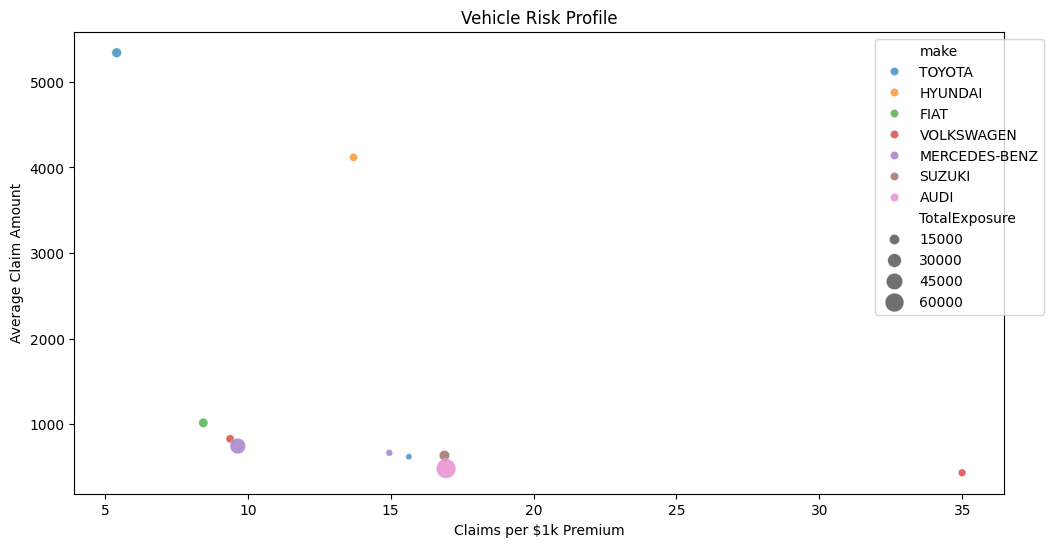

In [13]:
make_model_analysis = df.groupby(['make','Model']).agg(
    ClaimCount=('TotalClaims','size'),
    AverageClaim=('TotalClaims','mean'),
    TotalExposure=('TotalPremium','sum')
).assign(
    ClaimFrequency=lambda x: x['ClaimCount']/x['TotalExposure']*1000
).nlargest(10, 'AverageClaim')

print("Highest Risk Vehicles:")
print(make_model_analysis)

# Visualization
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=make_model_analysis.reset_index(),
    x='ClaimFrequency',
    y='AverageClaim',
    size='TotalExposure',
    hue='make',
    sizes=(20, 200),
    alpha=0.7
)
plt.title('Vehicle Risk Profile')
plt.xlabel('Claims per $1k Premium')
plt.ylabel('Average Claim Amount')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()